In [5]:
import matplotlib
import pandas as pd

In [13]:
oil = pd.read_csv("../retail/oil.csv", parse_dates=['date'])

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [14]:
oil.head()
oil.set_index("date")

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


<Axes: xlabel='date'>

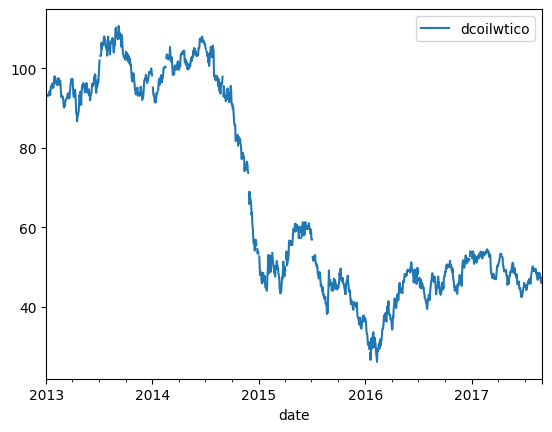

In [15]:
oil.set_index("date").plot()

<Axes: xlabel='date'>

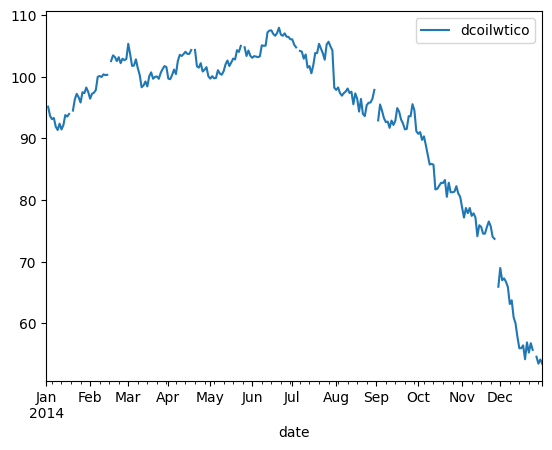

In [17]:
oil.set_index("date").loc["2014"].plot()

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

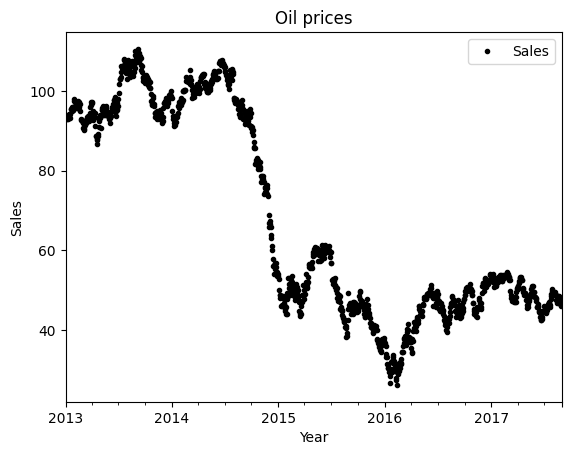

In [ ]:
(oil
.set_index("date")
.plot(
        title='Oil prices', 
        xlabel='Year', 
        ylabel='Sales', 
        color='Black',
        style='.'
    )
.legend(['Sales'])
)

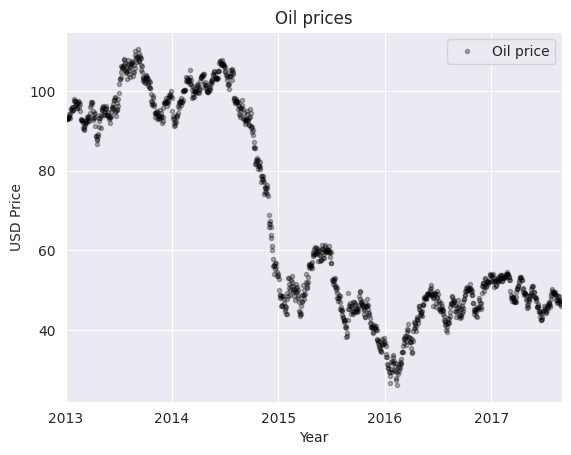

In [44]:
import seaborn as sns
sns.set_style('darkgrid')

(oil
.set_index("date")
.plot(
        title='Oil prices', 
        xlabel='Year', 
        ylabel='USD Price', 
        color='Black',
        style='.',
        alpha=.3
    )
.legend(['Oil price'])
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [66]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=['date'])
stores_1234 = (transactions
.query('store_nbr in [1, 2, 3, 4]')
.pivot(index='date', columns='store_nbr')
.droplevel(0, axis=1)
)

stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

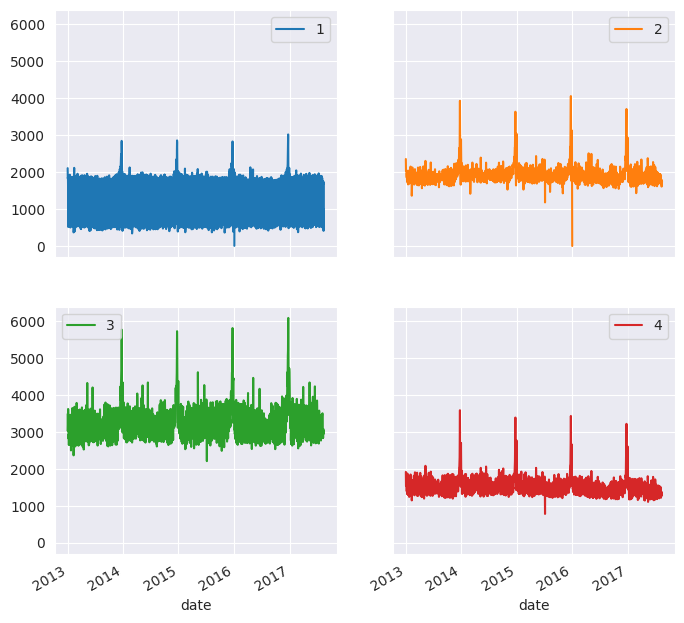

In [67]:
stores_1234.plot(subplots=True, layout=(2,2), sharey=True, figsize=(8,8))

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [124]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 
stores_1234.info()

stores_1234.agg('sum').sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1678 entries, 2013-01-02 to 2017-08-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1676 non-null   float64
 1   2       1677 non-null   float64
 2   3       1676 non-null   float64
 3   4       1676 non-null   float64
dtypes: float64(4)
memory usage: 65.5 KB


store_nbr
3    5366350.0
2    3219901.0
1    2553963.0
4    2519007.0
dtype: float64

<Axes: title={'center': 'Total Sales by Store'}, xlabel='Store', ylabel='Total Sales'>

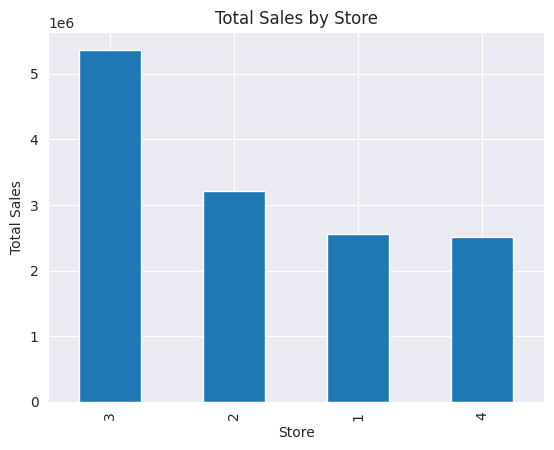

In [129]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
(stores_1234
.sum()
.sort_values(ascending=False)
.plot
.bar(xlabel='Store', ylabel='Total Sales', title='Total Sales by Store')
)

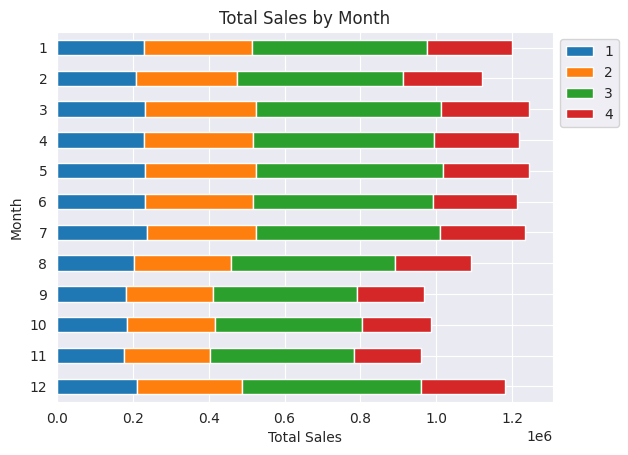

In [131]:
(stores_1234
.groupby(stores_1234.index.month)
.sum()
.sort_index(ascending=False)
.plot
.barh(xlabel='Total Sales', ylabel='Month', title='Total Sales by Month', stacked=True)
.legend(bbox_to_anchor=(1, 1))
)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

<Axes: xlabel='Store 3', ylabel='Store 2'>

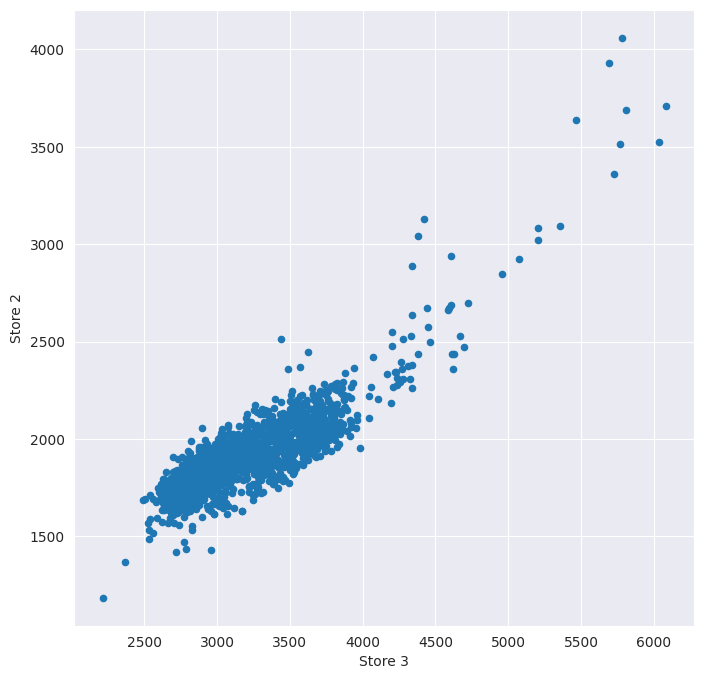

In [151]:
(stores_1234
.plot
.scatter(x=3, 
        y=2, 
        figsize=(8,8),
        xlabel="Store 3", 
        ylabel="Store 2"))

<Axes: xlabel='Store 3', ylabel='Store 2'>

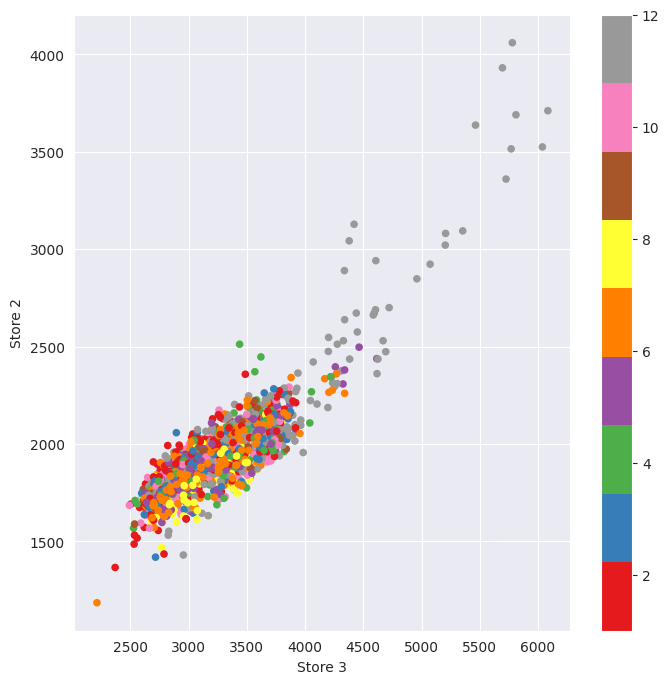

In [152]:
(stores_1234
.plot
.scatter(x=3, 
        y=2, 
        c=stores_1234.index.month,
        colormap="Set1", 
        figsize=(8,8),
        xlabel="Store 3", 
        ylabel="Store 2", 
        legend=True))

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [157]:
stores_1234[[2, 3]].head()

store_nbr,2,3
date,,
2013-01-02,2358.0,3487.0
2013-01-03,2033.0,3026.0
2013-01-04,2066.0,3188.0
2013-01-05,2062.0,3623.0
2013-01-06,1992.0,3590.0


<Axes: ylabel='Frequency'>

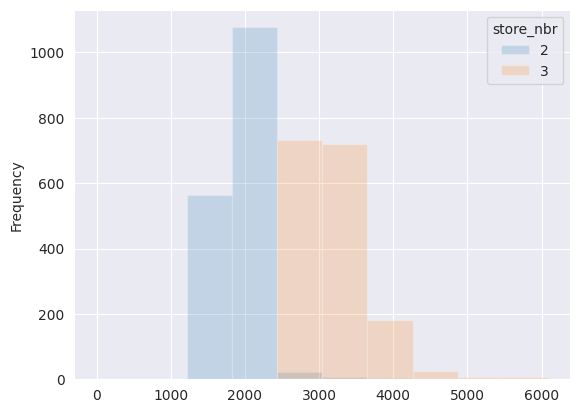

In [174]:
stores_1234[[2, 3]].plot.hist(alpha=0.2)

date
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
dtype: object

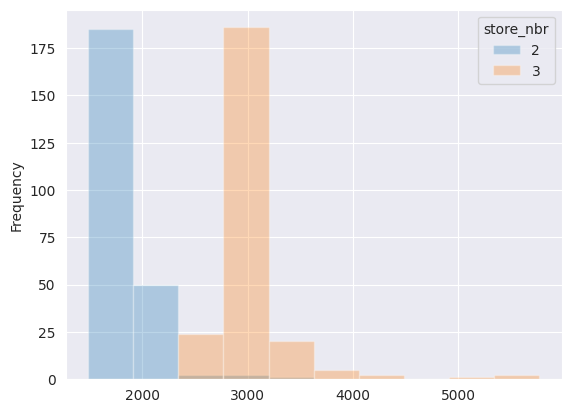

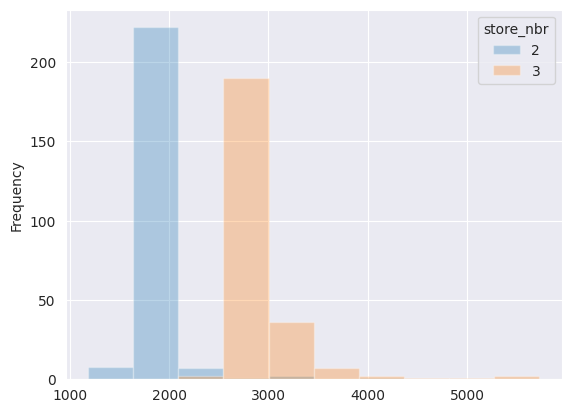

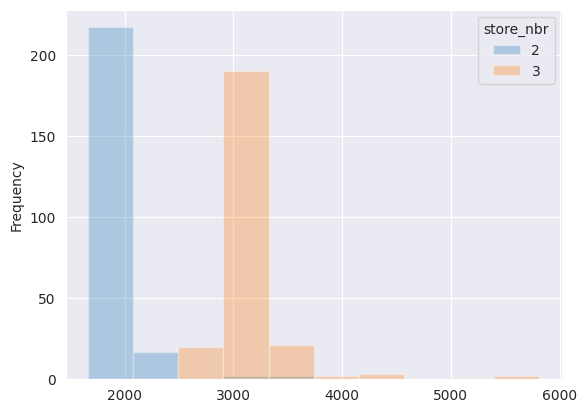

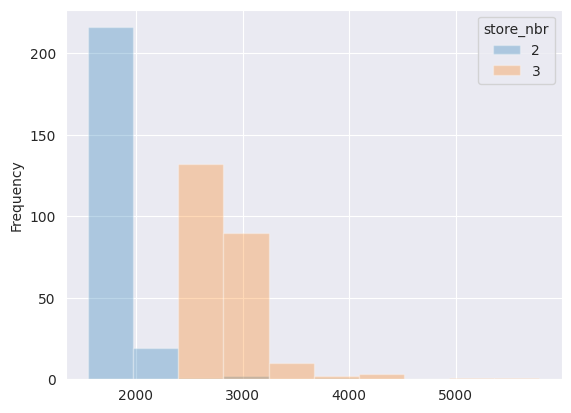

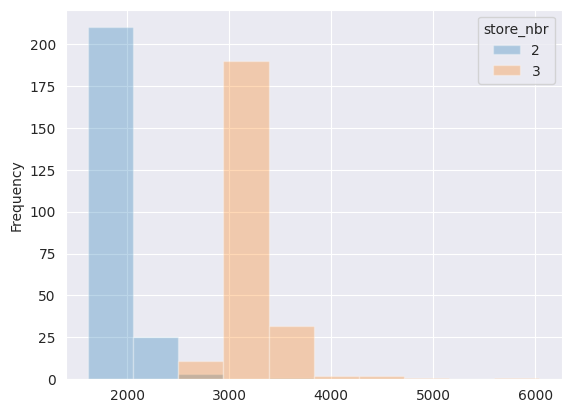

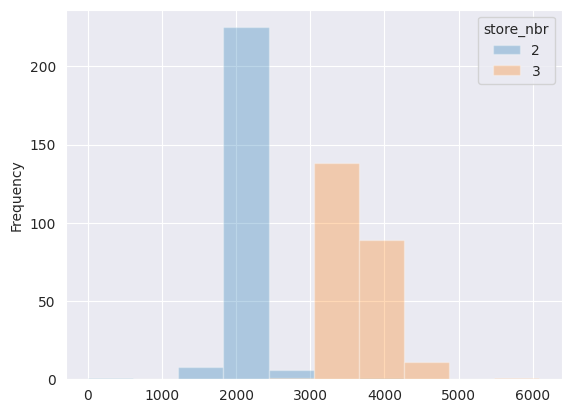

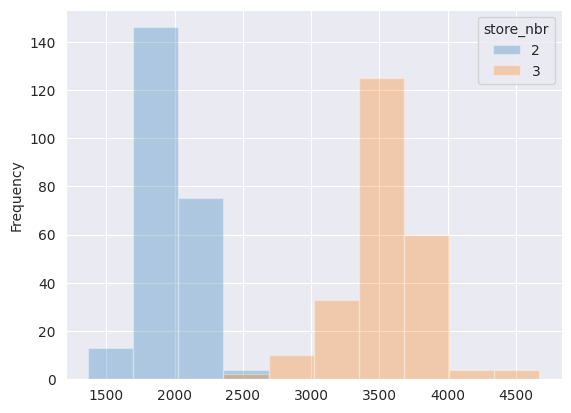

In [171]:
stores_1234.groupby(stores_1234.index.dayofweek)[[2, 3]].plot.hist(alpha=0.3)